In [1]:
from openpyxl import load_workbook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
from scipy import stats
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

In [2]:
wb = load_workbook('Murka_test_PA_2020.xlsx')
sheets = wb.sheetnames

In [3]:
print(wb.sheetnames)

['Задания', 'Данные', 'Данные 2', 'Данные 3', 'Мониторинг']


In [4]:
df_task3 = pd.read_excel('Murka_test_PA_2020.xlsx',sheet_name='Задания', skiprows = 61)

In [5]:
df_data1 = pd.read_excel('Murka_test_PA_2020.xlsx',sheet_name='Данные', skiprows = 2)
df_data1.head()

,id,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level
0,1,1962,female,863.545576,18.548843,841.559299,21,1,1.00,34
1,2,1972,female,498.545576,1.548843,3.559299,489,25,27.77,44
2,3,1970,male,333.545576,17.548843,333.559299,5,1,4.99,4
3,4,1962,male,148.545576,18.548843,144.559299,512,2,2.98,68
4,5,1956,male,149.545576,1.548843,102.559299,327,4,61.97,83


In [6]:
df_data2 = pd.read_excel('Murka_test_PA_2020.xlsx',sheet_name='Данные 2', skiprows = 2)
df_data2.head()

,id,Date,Spent
0,391133440,2020-01-01,23749
1,662027145,2020-01-01,39493
2,463348711,2020-01-01,13255
3,456025956,2020-01-01,12307
4,878269440,2020-01-01,39302


In [7]:
df_data3 = pd.read_excel('Murka_test_PA_2020.xlsx',sheet_name='Данные 3', skiprows = 2)
df_data3.head()

,Date,Source,Revenue
0,2020-01-06,shop,42759.0
1,2020-01-06,noMoneyOffer,18298.0
2,2020-01-06,chests,5637.0
3,2020-01-06,offer1,26273.0
4,2020-01-07,shop,41917.0


# Завдання 1

In [8]:
df_data1.shape

(6344, 10)

In [9]:
df_data1.head()

,id,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level
0,1,1962,female,863.545576,18.548843,841.559299,21,1,1.00,34
1,2,1972,female,498.545576,1.548843,3.559299,489,25,27.77,44
2,3,1970,male,333.545576,17.548843,333.559299,5,1,4.99,4
3,4,1962,male,148.545576,18.548843,144.559299,512,2,2.98,68
4,5,1956,male,149.545576,1.548843,102.559299,327,4,61.97,83


In [10]:
df_data1['Age'] = (2020-df_data1['Birth_y'])

In [11]:
def last_oper_part (data, days):
    #розрахунок частки ункіальних клієнтів, які здійснили
    #останній логін понад задану кількість днів
    cnt_tot       = data['id'].agg(['nunique'])
    cnt_condition = data.loc[data['LastLog_days_ago']>days,'id'].agg(['nunique'])
    part = float(cnt_condition/cnt_tot*100)
    print ('Частка унікальних клієнтів, які здійснили останній логін понад {} днів, становить {:0.2f} %'.format(days,part))
    return None

In [12]:
last_oper_part (df_data1, 7)

Частка унікальних клієнтів, які здійснили останній логін понад 7 днів, становить 37.03 %


In [13]:
def mean_session (data, days):
    #розрахунок середньої кількості сесій в клієнтів, які встановили гру
    #понад задану кількість днів   
    mean = data['LifeTime'][data['LifeTime']>days].mean()
    print ('Середня кількість сесій в користувачів, які встановили гру понад {} днів, становить {:0.2f}'.format(days,mean))
    return None

In [14]:
mean_session (df_data1, 365)

Середня кількість сесій в користувачів, які встановили гру понад 365 днів, становить 530.39


<IPython.core.display.Javascript object>


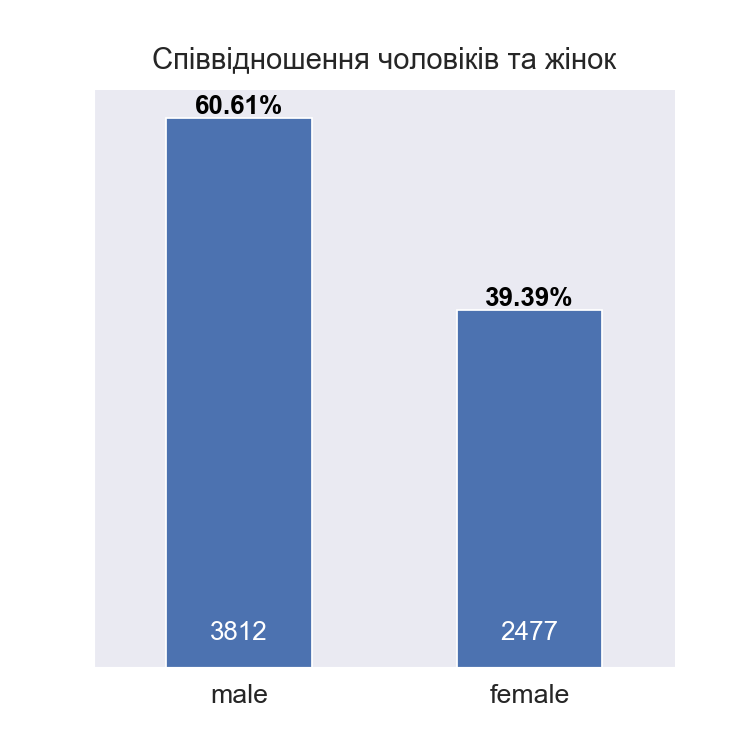

In [15]:
plt.figure()
sns.set(font_scale=1.4)
df_data1['Sex'].value_counts().plot(kind='bar', figsize=(6, 6), rot=0)
plt.ylabel("Count of People", labelpad=10)
plt.title("Співвідношення чоловіків та жінок", y=1.02)
tot = df_data1['Sex'].agg(['count'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.grid(False)
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., 0),
                 ha='center', va='center', fontsize=15, color='white', xytext=(0, 20),
                 textcoords='offset points')
for p in ax.patches:
             cnt_gender=p.get_height()
             part=float(cnt_gender/tot*100)
             ax.annotate("{:0.2f}%".format(part), (p.get_x() + p.get_width() / 2., p.get_height()-250),
                 ha='center', va='bottom', fontsize=15, color='black', xytext=(0, 20),fontweight ='bold',
                 textcoords='offset points')
        

In [65]:
age_data = df_data1['Age'].value_counts()
bins = df_data1['Age'].unique()
bins

array([ 58,  48,  50,  64,  56,  53,  62,  70,  79,  40,  72,  52,  90,
        73,  68,  43,  63,  51,  46,  45,  76,  55,  67,  42,  69,  78,
        57, 115,  49,  65,  54,  60,  37,  71,  61,  77,  66,  75,  39,
        41,  84,  47,  36,  59,  44,  83,  74,  32,  20,  28,  35,  80,
        81,  85,  30,  82,  31,  27,  23,  89,  22,  25,  33,  34,  38,
        87,  86,  21,  92,  29,  99,  24, 105, 103, 107, 110, 106,  93,
        26,  91, 100, 109,  88,  94, 114, 113,  96,  98], dtype=int64)

In [69]:
age_data_m =  df_data1['Age'][df_data1['Sex'] == 'male'].value_counts()
age_data_f =  df_data1['Age'][df_data1['Sex'] == 'female'].value_counts()

<IPython.core.display.Javascript object>


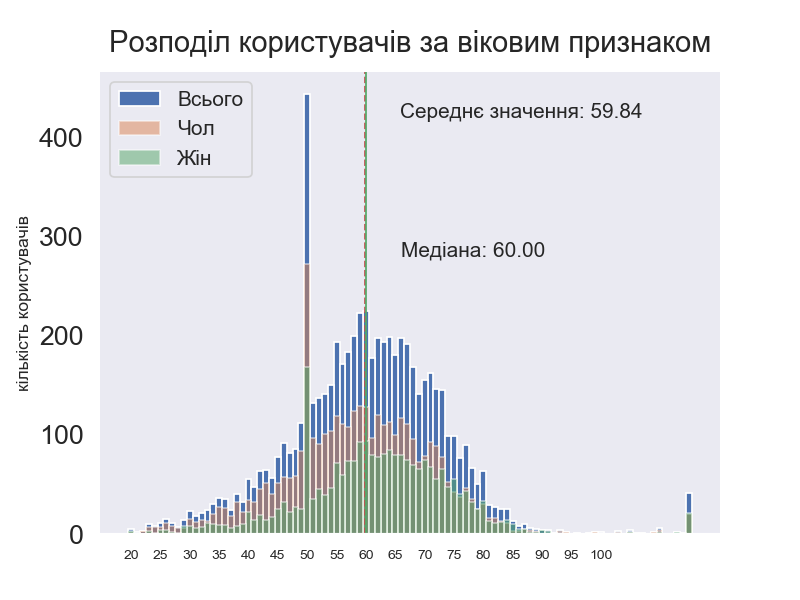

In [84]:
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('кількість користувачів', fontsize = 10)
plt.title("Розподіл користувачів за віковим признаком", y=1.02)
ax.set_xticks([20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.rcParams['xtick.labelsize']=8
ax.grid(False)
plt.bar(age_data.index, age_data.values,width = 1, label='Всього')
plt.bar(age_data_m.index, age_data_m.values,width = 1,alpha = 0.5, label='Чол')
plt.bar(age_data_f.index, age_data_f.values, alpha = 0.5, width = 1, label='Жін')

plt.axvline(df_data1['Age'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_data1['Age'].median(), color='g', linestyle='solid', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_data1['Age'].mean()*1.1, max_ylim*0.9, 'Середнє значення: {:.2f}'.format(df_data1['Age'].mean()), fontsize=12)
plt.text(df_data1['Age'].median()*1.1, max_ylim*0.6, 'Медіана: {:.2f}'.format(df_data1['Age'].median()),fontsize=12)
ax.legend(fontsize = 12, loc='upper left')
plt.show()

In [19]:
df_data1_age = df_data1[['Age']].groupby(df_data1['Age']).agg(['count'])
df_data1_age.columns = ['Count']

In [20]:
df_data1_age.sort_values(by = 'Count', ascending = False).T

Age,50,60,59,58,64,62,66,55,63,67,...,100,109,21,113,96,98,92,106,107,114
Count,444,225,223,200,199,198,198,194,194,192,...,2,2,2,2,1,1,1,1,1,1


In [21]:
#визначення аутлаєрів по віковом параметрам
df_data1['Z_value'] = stats.zscore(df_data1['Age'])
out = df_data1[abs(df_data1['Z_value'])>3]
out.head()

,id,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,Age,Z_value
54,55,1905,female,135.545576,12.548843,84.559299,130,10,37.90,83,115,4.194075
205,206,2000,female,301.545576,3.548843,158.559299,214,9,37.91,35,20,-3.029802
276,277,1905,female,112.545576,1.548843,20.559299,272,3,15.97,76,115,4.194075
395,396,1905,male,102.545576,9.548843,16.559299,39,1,0.99,21,115,4.194075
535,536,1905,female,284.545576,2.548843,2.559299,560,144,5048.62,393,115,4.194075


<IPython.core.display.Javascript object>


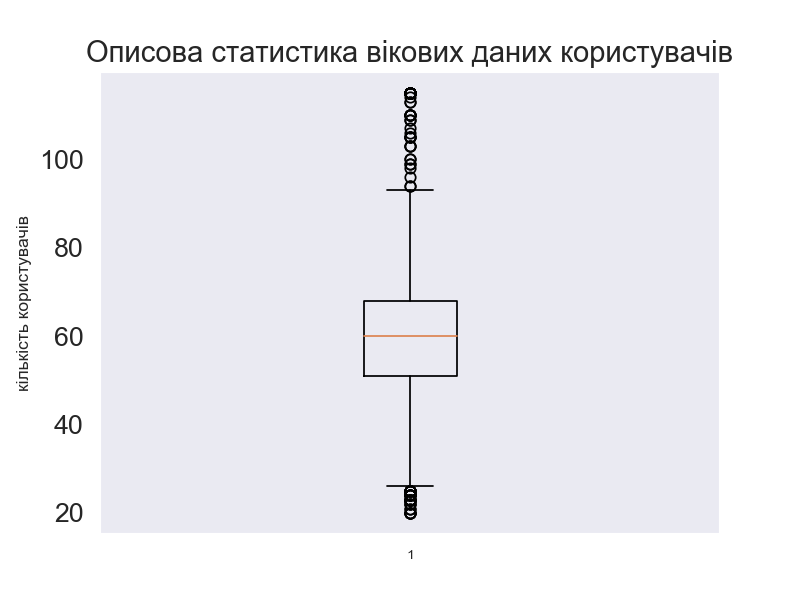

count    6344.00000
mean       59.84442
std        13.15187
min        20.00000
25%        51.00000
50%        60.00000
75%        68.00000
max       115.00000
Name: Age, dtype: float64

In [85]:
plt.figure()
plt.boxplot(df_data1['Age'])
ax = plt.gca()
plt.ylabel('кількість користувачів', fontsize = 10)
ax.grid(False)
plt.title("Описова статистика вікових даних користувачів")
plt.show()
df_data1['Age'].describe()

# Завдання 5

In [29]:
df_data2_gr = df_data2[['Date','Spent']].groupby(df_data2['Date']).agg(['sum'])

In [30]:
df_data2_gr['Spent, mln'] = (df_data2_gr['Spent']/1000000).round(1)

<IPython.core.display.Javascript object>


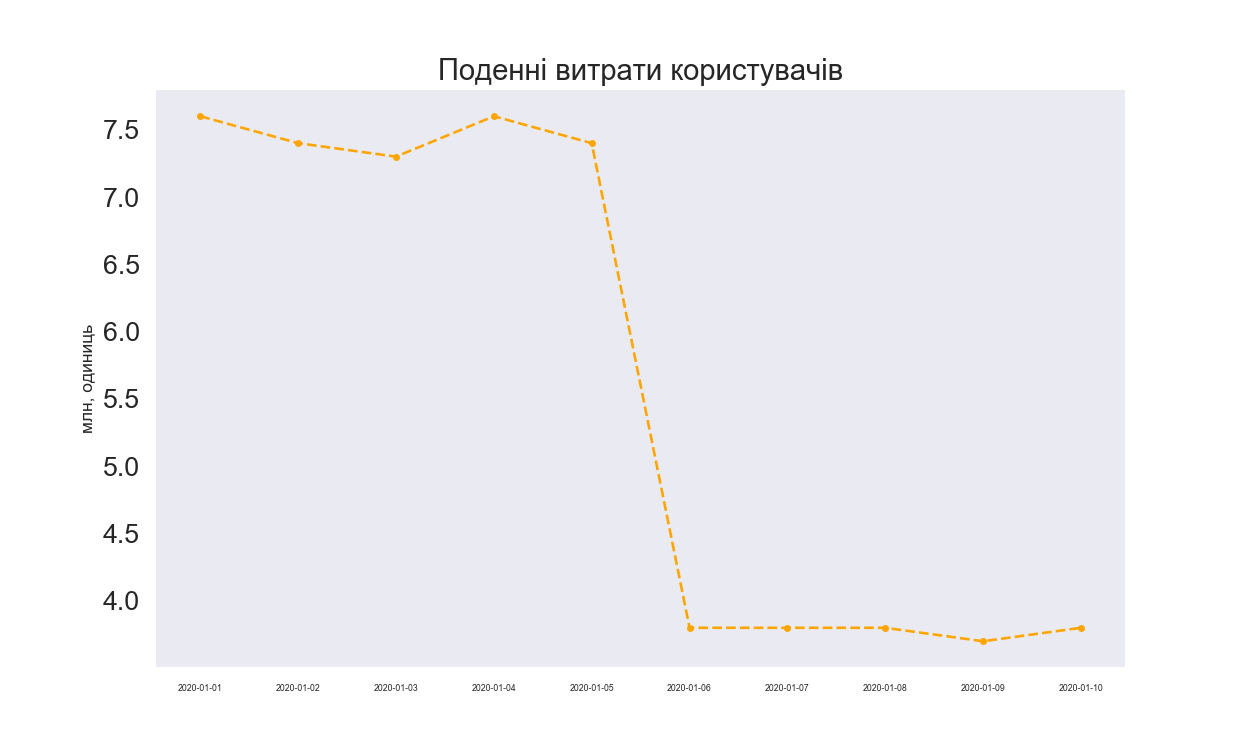

In [31]:
plt.figure(figsize = (10,6))
plt.plot(df_data2_gr['Spent, mln'], '--.', c = 'orange')
plt.title('Поденні витрати користувачів')
plt.ylabel('млн, одиниць', fontsize = 10)
ax = plt.gca()
ax.set_xticks((df_data2_gr.index))
plt.xticks(rotation=0, fontsize = 5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)
#ax.set_xticklabels(df_data2_gr.index)
plt.show()

# Завдання 6

In [32]:
df_data3.head()

,Date,Source,Revenue
0,2020-01-06,shop,42759.0
1,2020-01-06,noMoneyOffer,18298.0
2,2020-01-06,chests,5637.0
3,2020-01-06,offer1,26273.0
4,2020-01-07,shop,41917.0


In [33]:
def week_create(row):
    date1 = datetime.strptime('2020-01-06', '%Y-%m-%d')
    date2 = datetime.strptime('2020-01-12', '%Y-%m-%d')
    date3 = datetime.strptime('2020-01-18', '%Y-%m-%d')
    if ((row['Date'] >= date1) & (row['Date'] <= date2)):
        val = 'Week1'
    elif ((row['Date'] > date2) & (row['Date'] <= date3)):
        val = 'Week2'
    else:
        val = 'Week3'
    return val

In [34]:
df_data3['Week'] = df_data3.apply(week_create, axis=1)

In [35]:
df_data3.head()

,Date,Source,Revenue,Week
0,2020-01-06,shop,42759.0,Week1
1,2020-01-06,noMoneyOffer,18298.0,Week1
2,2020-01-06,chests,5637.0,Week1
3,2020-01-06,offer1,26273.0,Week1
4,2020-01-07,shop,41917.0,Week1


In [36]:
Week1 = df_data3['Revenue'][df_data3['Week'] == 'Week1']
Week2 = df_data3['Revenue'][df_data3['Week'] == 'Week2']
Week3 = df_data3['Revenue'][df_data3['Week'] == 'Week3']

print ('Середнє значення доходу в тиждень {} становить {} '.format('Week1', Week1.mean()))

print ('Середнє значення доходу в тиждень {} становить {} '.format('Week2', Week2.mean()))

print ('Середнє значення доходу в тиждень {} становить {} '.format('Week3', Week3.mean()))

Середнє значення доходу в тиждень Week1 становить 22576.60714285714 
Середнє значення доходу в тиждень Week2 становить 20031.785 
Середнє значення доходу в тиждень Week3 становить 15659.2785025641 


In [37]:
stats.ttest_ind(Week1, Week2)

Ttest_indResult(statistic=0.7003820329932321, pvalue=0.48693515299503043)

In [38]:
stats.ttest_ind(Week1, Week3)

Ttest_indResult(statistic=2.566677848617707, pvalue=0.012579759150859364)

In [39]:
stats.ttest_ind(Week2, Week3)

Ttest_indResult(statistic=1.6081282867506779, pvalue=0.11297116805434254)

# Завдання 2

In [40]:
df_data1['Sex_cat'] = df_data1['Sex'].astype('category').cat.codes

<IPython.core.display.Javascript object>


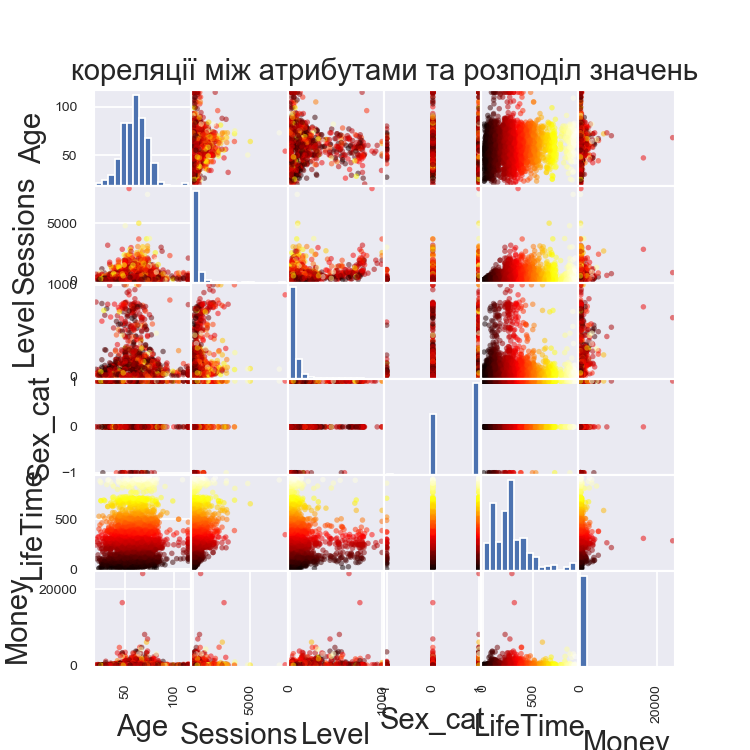

In [44]:
X = df_data1[['Age','Sessions', 'Level', 'Sex_cat', 'LifeTime', 'Money']]
y = df_data1['LifeTime']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('hot')
scatter = pd.plotting.scatter_matrix(X_train, 
                                     c= y_train,
                                     marker = 'o',
                                     s=10, 
                                     hist_kwds={'bins':15},
                                     figsize=(6,6),
                                     cmap=cmap)
ax = plt.gcf()
plt.title('кореляції між атрибутами та розподіл значень', y=+6, x=-2)
plt.show()

<IPython.core.display.Javascript object>


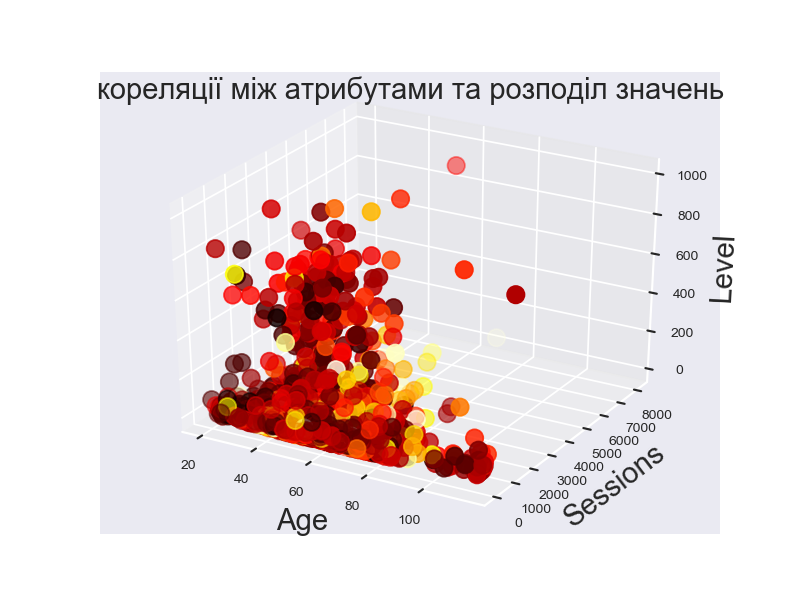

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Age'], X_train['Sessions'], X_train['Level'], c = y_train, marker = 'o', s=100, cmap=plt.cm.hot)
ax.set_xlabel('Age')
ax.set_ylabel('Sessions')
ax.set_zlabel('Level')
plt.title('кореляції між атрибутами та розподіл значень')
plt.show()

In [46]:
K_data = df_data1[['Age','Sessions', 'Level']]
y_data = df_data1['LifeTime']

In [47]:
X_k = K_data.values
X_k = np.nan_to_num(X_k)
Clus_dataSet = StandardScaler().fit_transform(X_k)
Clus_dataSet

array([[-0.14025118, -0.61769689, -0.3058369 ],
       [-0.90065924,  0.52326751, -0.22237038],
       [-0.74857763, -0.65670422, -0.55623645],
       ...,
       [ 1.53264657, -0.64939034, -0.51450319],
       [ 0.39203447,  2.27128349, -0.37261011],
       [ 1.30452415, -0.57381364, -0.43103667]])

In [48]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_k)
labels = k_means.labels_
print(len(labels), labels)

6344 [0 2 0 ... 0 2 0]


In [49]:
K_data["Clus_km"] = labels
K_data.head(5)

C:\Python_anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Sessions,Level,Clus_km
0,58,21,34,0
1,48,489,44,2
2,50,5,4,0
3,58,512,68,2
4,64,327,83,0


In [50]:
K_data.groupby('Clus_km').mean()

,Age,Sessions,Level
Clus_km,,,
0,59.305287,122.858152,49.343826
1,61.034091,1769.323864,289.312500
2,61.875208,640.825291,123.414309
3,62.000000,5002.300000,434.100000
